In [105]:
#Import python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the dataset
cancer_df = pd.read_csv('Cancer_Dataset.csv')

In [7]:
cancer_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
len(cancer_df)

768

In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies       768 non-null int64
Glucose           768 non-null int64
BloodPressure     768 non-null int64
SkinThickness     768 non-null int64
Insulin           768 non-null int64
BMI               768 non-null float64
Cancer_Markers    768 non-null float64
Age               768 non-null int64
Outcome           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
cancer_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis on dataset

###### a. Finding mean, max and min across each attribute

In [39]:
print('Variable\t\tMean\t\tMaximum\t\tMinimum')
print('-------------------------------------------------------------')
for x in cancer_df.columns:
    avg = np.average(cancer_df[x]).round(1)
    max = np.max(cancer_df[x])
    min = np.min(cancer_df[x])
    print(x.rjust(15,' '),'\t',avg,'\t\t',max,'\t\t',min)

Variable		Mean		Maximum		Minimum
-------------------------------------------------------------
    Pregnancies 	 3.8 		 17 		 0
        Glucose 	 120.9 		 199 		 0
  BloodPressure 	 69.1 		 122 		 0
  SkinThickness 	 20.5 		 99 		 0
        Insulin 	 79.8 		 846 		 0
            BMI 	 32.0 		 67.1 		 0.0
 Cancer_Markers 	 0.5 		 2.42 		 0.078
            Age 	 33.2 		 81 		 21
        Outcome 	 0.3 		 1 		 0


###### b. Finding NA values across data & filling them up with mean/median

In [40]:
# Find out if there is any NULL values in the dataframe
cancer_df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

In [43]:
# Check how many zero values are there in the different columns
print('Variable\t\tZero Count')
print('-------------------------------------------------------------')
for x in cancer_df.columns:
    zero_cnt = len(cancer_df[cancer_df[x] == 0])
    print(x.rjust(15,' '),'\t',zero_cnt)
    

Variable		Zero Count
-------------------------------------------------------------
    Pregnancies 	 111
        Glucose 	 5
  BloodPressure 	 35
  SkinThickness 	 227
        Insulin 	 374
            BMI 	 11
 Cancer_Markers 	 0
            Age 	 0
        Outcome 	 500


In [45]:
imputation_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for x in imputation_cols:
    cancer_df[x] = cancer_df[x].mask(cancer_df[x]==0).fillna(cancer_df[x].mean())

###### c. Scatter plots and pair plots of attributes showcasing their relationship

In [103]:
cancer_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 0, 'No of Pregnancies')

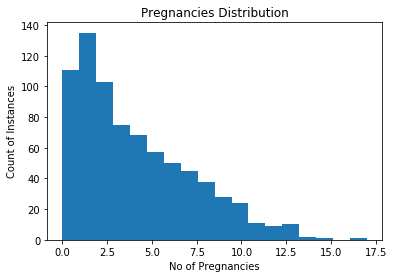

In [20]:
# Check the distribution for Pregnancies column
plt.hist(cancer_df['Pregnancies'],bins=18)
plt.title('Pregnancies Distribution')
plt.ylabel('Count of Instances')
plt.xlabel('No of Pregnancies')

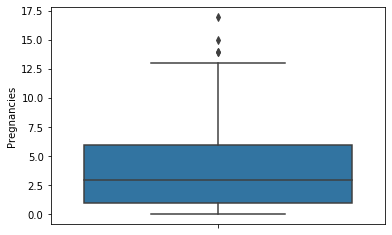

In [107]:
sns.boxplot(y=cancer_df['Pregnancies'])

Text(0.5, 0, 'Glucose')

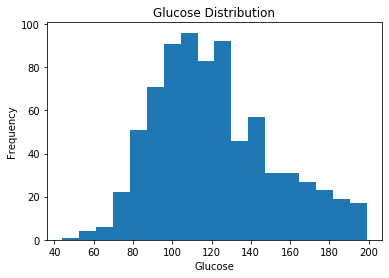

In [108]:
# Check the distribution for Glucose column
plt.hist(cancer_df['Glucose'],bins=18)
plt.title('Glucose Distribution')
plt.ylabel('Frequency')
plt.xlabel('Glucose')

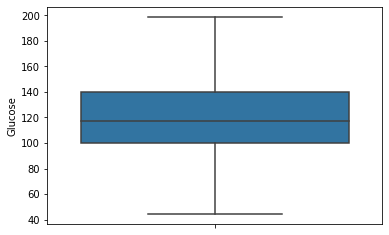

In [110]:
sns.boxplot(y=cancer_df['Glucose'])

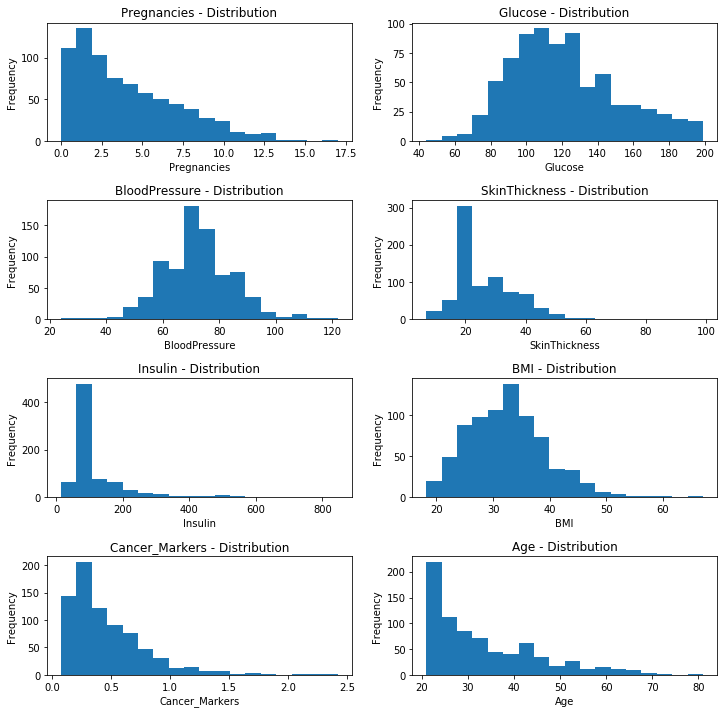

In [129]:
# Check the distribution for Glucose column
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
ary = np.ndarray.flatten(ax)
fig.subplots_adjust(hspace=.5)

n=0
for x in cancer_df.columns:
    if x != 'Outcome':
        ary[n].hist(cancer_df[x],bins=18)
        ary[n].set_title(x+' - Distribution')
        ary[n].set_ylabel('Frequency')
        ary[n].set_xlabel(x)
        n=n+1

###### d. Heatmap showing correlations among attributes

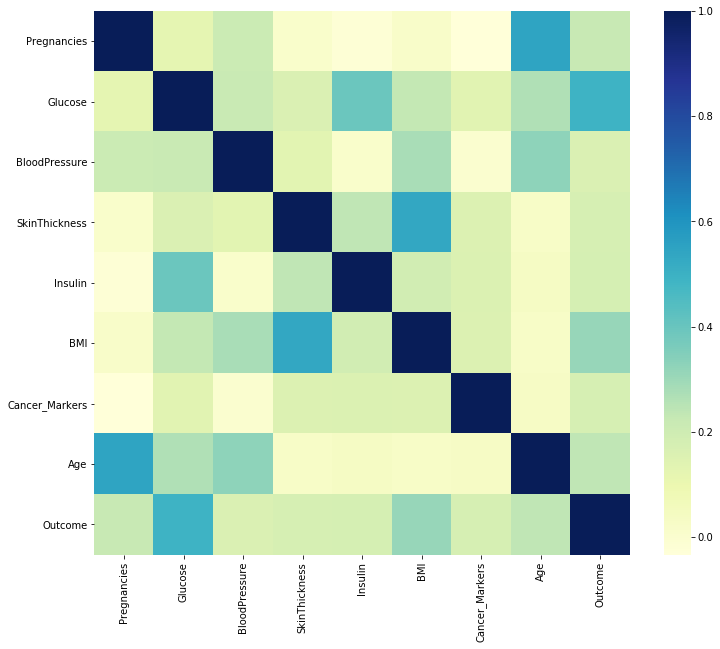

In [70]:
corr = cancer_df.corr()
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

###### e. Scaling the data for correct model building 

In [59]:
cancer_X = cancer_df.iloc[:,0:8]
cancer_y = cancer_df.iloc[:,-1]

In [62]:
scaler = StandardScaler()
cancer_X = scaler.fit_transform(cancer_X)

## Building the KNN classifier by finding best value of K

###### a. Build the k-Nearest Negihbour Model

In [74]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.3, random_state=777, stratify=cancer_y)

In [83]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [87]:
# Run the model for different k values and store the train and test accuracies for each case
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

###### b. Plotting elbow curve

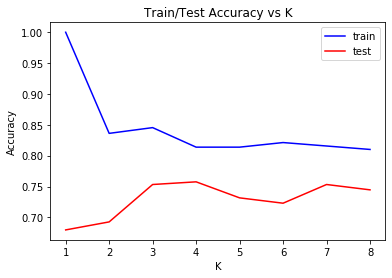

In [88]:
# Plot the train and test accuracy for diffent values of k
plt.plot(neighbors, train_accuracy, color='blue', label='train')
plt.plot(neighbors, test_accuracy, color='red', label='test')
plt.title('Train/Test Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### c. Finding best value of K

In [92]:
# Check the accuracy at knnn=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('Train Accuracy', knn.score(X_train, y_train))
print('Test Accuracy', knn.score(X_test, y_test)) 

Train Accuracy 0.813780260707635
Test Accuracy 0.7575757575757576


In [91]:
# Check the accuracy at knnn=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Train Accuracy', knn.score(X_train, y_train))
print('Test Accuracy', knn.score(X_test, y_test)) 

Train Accuracy 0.8156424581005587
Test Accuracy 0.7532467532467533


## 3. Model performance Analysis

###### a. Printing confusing matrix - mention the values of True Positives, True Negatives, False Positives & False Negatives

In [99]:
y_pred = knn.predict(X_test)

In [102]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,137,13,150
1,43,38,81
All,180,51,231


###### b. Finding F1 score of the model

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       150
           1       0.75      0.47      0.58        81

    accuracy                           0.76       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.76      0.76      0.74       231

